<a href="https://colab.research.google.com/github/Raksantos/A.I-Studying/blob/master/4_Introdu%C3%A7%C3%A3o_a_Machine_Learning_Classifica%C3%A7%C3%A3o_Valida%C3%A7%C3%A3o_de_Modelos_e_outros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
mapa = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}

dados = dados.rename(columns=mapa);
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_trocar = {
    "no": 0,
    "yes": 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [ ]:
dados = dados.drop(columns = ["Unnamed: 0", "ano_do_modelo"], axis = 1)
dados.head()

,milhas_por_ano,preco,vendido,idade_do_modelo,km_por_ano
0,21801,30941.02,1,21,35085.22134
1,7843,40557.96,1,23,12622.05362
2,7109,89627.50,0,15,11440.79806
3,26823,95276.14,0,6,43167.32682
4,7935,117384.68,1,7,12770.11290


In [ ]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 62.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
acuracia

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.44%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy most frequent foi %.2f%%" % acuracia)

A acurácia do dummy most frequent foi 52.64%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


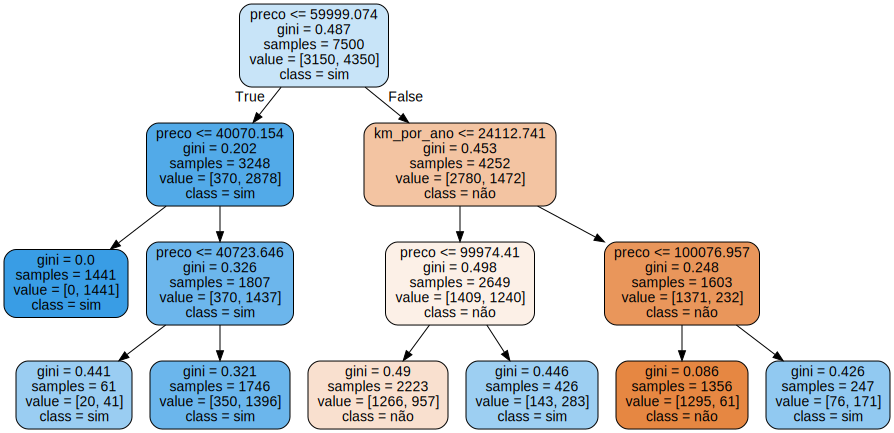

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_data = export_graphviz(modelo, out_file = None, feature_names=features, filled=True, rounded=True,
                           class_names=["não", "sim"])
grafico  = graphviz.Source(dot_data)
grafico

#Machine Learning: Vaidação de Modelos

##Validação Cruzada e Aleatoriedade Inicial

In [ ]:
from sklearn.model_selection import cross_validate

SEED = 158020#independente do seed, a acurácia será a mesma
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = 5)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print("Accuracy com cross validation, 5 = [%.2f%%, %.2f%%]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 5 = [75.21%, 76.35%]


#KFold e Aleatoriedade
##Aleatoriedaede no cross validate

In [ ]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print("Accuracy média: %.2f" % (media * 100))
  print("Accuracy intervalo com cross validation = [%.2f%%, %.2f%%]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

SEED = 158020#independente do seed, a acurácia será a mesma
np.random.seed(SEED)

cv = KFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = cv)
imprime_resultados(results)

Accuracy média: 75.78
Accuracy intervalo com cross validation = [74.37%, 77.19%]


In [ ]:
SEED = 158020#independente do seed, a acurácia será a mesma
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle=True)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = cv)
imprime_resultados(results)

Accuracy média: 75.78
Accuracy intervalo com cross validation = [73.58%, 77.98%]


#Estratificação
##Simular situação horrível de azar

Pode ser "azar" como pode ser uma proporção de exemplos desbalanceado entre as classes.

In [ ]:
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,milhas_por_ano,preco,vendido,idade_do_modelo,km_por_ano
4999,15418,74023.29,0,15,24812.80412
5322,14351,84843.49,0,16,23095.63834
5319,22519,83100.27,0,22,36240.72746
5316,20039,87932.13,0,19,32249.56426
5315,17656,77937.01,0,18,28414.50704


In [ ]:
from sklearn.model_selection import KFold

SEED = 158020#independente do seed, a acurácia será a mesma
np.random.seed(SEED)

cv = KFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x_azar, y_azar, cv = cv)
imprime_resultados(results)

##Sem shuffle

Accuracy média: 57.84
Accuracy intervalo com cross validation = [34.29%, 81.39%]


In [ ]:
from sklearn.model_selection import KFold

SEED = 158020#independente do seed, a acurácia será a mesma
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle=True)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = cv)
imprime_resultados(results)

##Com o shuffle

Accuracy média: 75.78
Accuracy intervalo com cross validation = [73.58%, 77.98%]


In [ ]:
from sklearn.model_selection import StratifiedKFold

SEED = 158020#independente do seed, a acurácia será a mesma
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 10, shuffle=True)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = cv)
imprime_resultados(results)

Accuracy média: 75.78
Accuracy intervalo com cross validation = [74.32%, 77.24%]


#Dados Agrupáveis

In [ ]:
#Gerando coluna para modelo dos carros de forma aleatória
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size = 10000)
dados.head()

,milhas_por_ano,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,21801,30941.02,1,21,35085.22134,20
1,7843,40557.96,1,23,12622.05362,23
2,7109,89627.50,0,15,11440.79806,15
3,26823,95276.14,0,6,43167.32682,5
4,7935,117384.68,1,7,12770.11290,5


In [ ]:
dados.modelo.unique()

array([20, 23, 15,  5, 13, 12, 21,  7, 19,  9,  8, 24, 18, 16, 14, 17, 11,
        6, 22, 10, 25,  3,  4,  2])

#Testando Cross Validation com GroupKFold

In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 158020#independente do seed, a acurácia será a mesma
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

#Lemrabndo que o x_azar, y_azar, ainda que não tenho a coluna modelo, não impactam no desempenho do modelo
#pois a coluna modelo é utilizada apenas para o agrupamento, mas as análises do modelo ainda estão sendo
#feitas com as outras colunas

Accuracy média: 75.76
Accuracy intervalo com cross validation = [72.91%, 78.60%]


#Cross Validation com StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
treino_x_escalado = scaler.fit_transform(treino_x)
teste_x_escalado = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x_escalado, treino_y)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A Acurácia foi de %.2f" % acuracia)

A Acurácia foi de 77.48


In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = SVC()
results = cross_validate(model, x_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

Accuracy média: 77.25
Accuracy intervalo com cross validation = [73.74%, 80.75%]


In [ ]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
modelo = SVC()

SEED = 301

pipeline = Pipeline([("transformacao", scaler), ("estimador", modelo)])

np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

Accuracy média: 76.66
Accuracy intervalo com cross validation = [73.65%, 79.66%]


#Machine Learning: Otimização de modelos por hiperparâmetros
##Aula 1: Hiperparâmetros, overfit e otimização copy 5

In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo)
imprime_resultados(results)

Accuracy média: 78.68
Accuracy intervalo com cross validation = [76.27%, 81.09%]


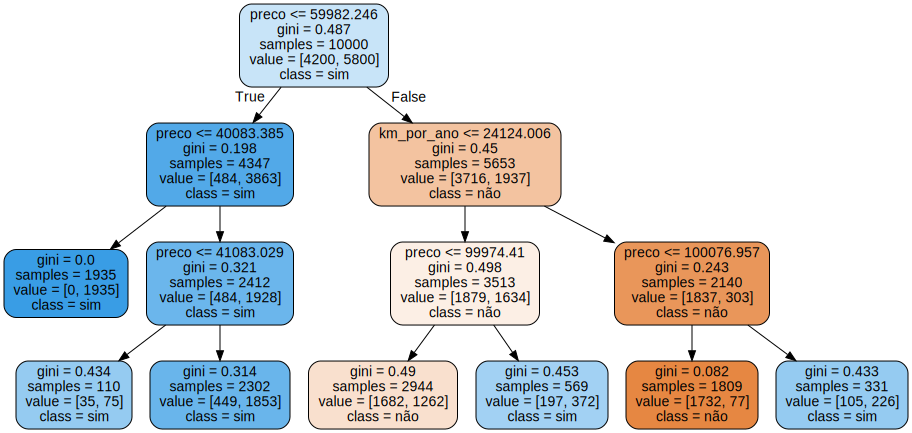

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
#TESTANDO PARÂMETROS

def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)

  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)

  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  print("Arvore: max depth = %d, media de treino = %.2f, media de teste = %.2f" %  (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1, 33)]  #O decaimento da acurácia com o aumento da profundidade mostra que temos um caso de overfitting
resultados = pd.DataFrame(resultados, columns = ['max_depth', 'train', 'test'])

Arvore: max depth = 1, media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 2, media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 3, media de treino = 78.75, media de teste = 78.68
Arvore: max depth = 4, media de treino = 78.79, media de teste = 78.62
Arvore: max depth = 5, media de treino = 78.93, media de teste = 78.50
Arvore: max depth = 6, media de treino = 79.17, media de teste = 78.34
Arvore: max depth = 7, media de treino = 79.47, media de teste = 77.80
Arvore: max depth = 8, media de treino = 79.93, media de teste = 77.86
Arvore: max depth = 9, media de treino = 80.49, media de teste = 77.46
Arvore: max depth = 10, media de treino = 81.20, media de teste = 76.86
Arvore: max depth = 11, media de treino = 82.05, media de teste = 76.81
Arvore: max depth = 12, media de treino = 83.01, media de teste = 76.08
Arvore: max depth = 13, media de treino = 84.03, media de teste = 75.81
Arvore: max depth = 14, media de treino = 85.06, media de teste = 75.61
A

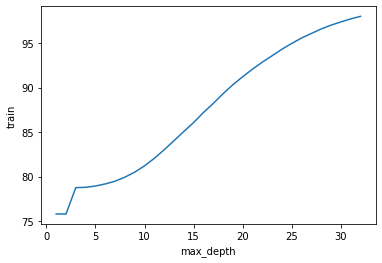

In [ ]:
import seaborn as sns

sns.lineplot(data = resultados, x = "max_depth", y = "train")

#Overfit: Ficou perfeito para o treino, mas ruim para o teste

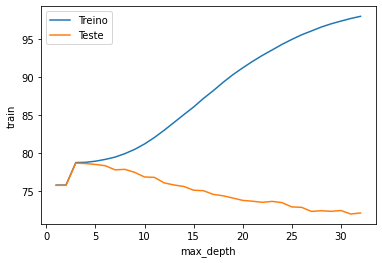

In [ ]:
import matplotlib.pyplot as plt


sns.lineplot(data = resultados, x = "max_depth", y = "train")
sns.lineplot(data = resultados, x = "max_depth", y = "test")
plt.legend(["Treino", "Teste"])

In [ ]:
resultados.sort_values("test", ascending=False).head()
#A árvore com a profundidade 3 mostrou um melhor resultado nos testes

,max_depth,train,test
2,3,78.754487,78.682407
3,4,78.786731,78.622384
4,5,78.934461,78.504096
5,6,79.171225,78.340518
7,8,79.931192,77.860485


#Explorando 2 dimensões de hiperparâmetros

In [ ]:
#TESTANDO PARÂMETROS

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)

  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  print("Arvore: max depth = %d, min_samples_leaf = %d,  media de treino = %.2f, media de teste = %.2f" %  (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  
  return tabela

def busca():
  resultados = []
  for max_depth in range(1, 33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'train', 'min_samples_leaf', 'test'])
  return resultados

resultados = busca()

Arvore: max depth = 1, min_samples_leaf = 32,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 1, min_samples_leaf = 64,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 1, min_samples_leaf = 128,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 1, min_samples_leaf = 256,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 2, min_samples_leaf = 32,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 2, min_samples_leaf = 64,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 2, min_samples_leaf = 128,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 2, min_samples_leaf = 256,  media de treino = 75.79, media de teste = 75.76
Arvore: max depth = 3, min_samples_leaf = 32,  media de treino = 78.75, media de teste = 78.69
Arvore: max depth = 3, min_samples_leaf = 64,  media de treino = 78.75, media de teste = 78.69
Arvore: max depth = 3, min_samples_leaf = 128,

In [ ]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,min_samples_leaf,test
11,3,256,78.751156,78.692477
19,5,256,78.751156,78.692477
15,4,256,78.751156,78.692477
14,4,128,78.751156,78.692477
13,4,64,78.751156,78.692477


In [ ]:
corr = resultados.corr()

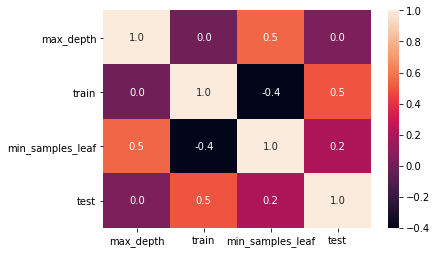

In [ ]:
sns.heatmap(corr, annot = True, fmt = ".1f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ca631c90>,
      dtype=object)

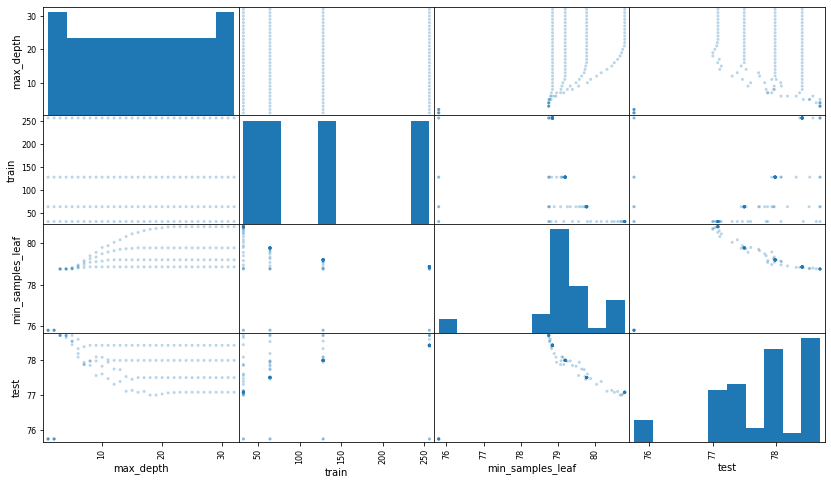

In [ ]:
pd.plotting.scatter_matrix(resultados, figsize=(14, 8), alpha=0.3)

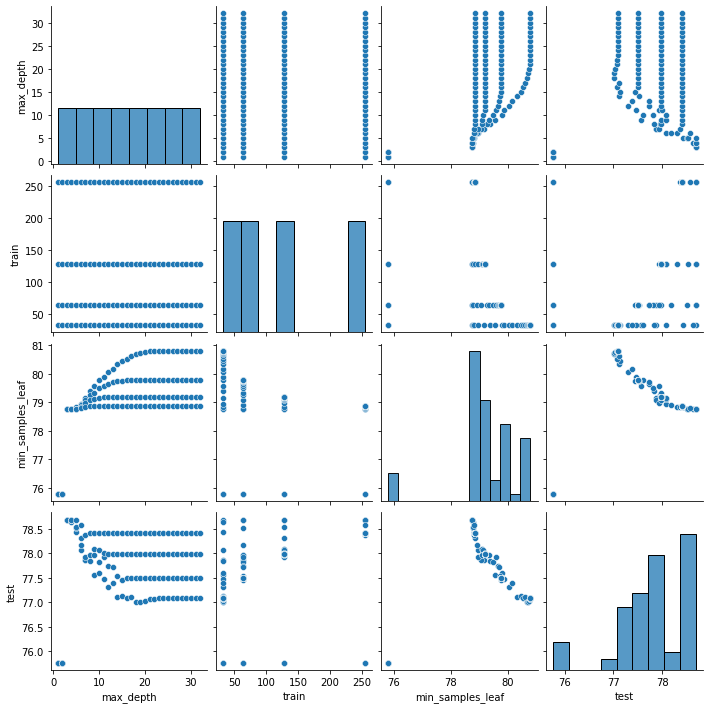

In [ ]:
sns.pairplot(resultados)

#Aula 3: Trabalhando com 3 ou mais dimensões

In [ ]:
#TESTANDO PARÂMETROS

def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)

  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()

  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  
  return tabela

def busca():
  resultados = []
  for max_depth in range(1, 33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'train',  'test', 'fit_time', 'score_time'])
  return resultados

resultados = busca()

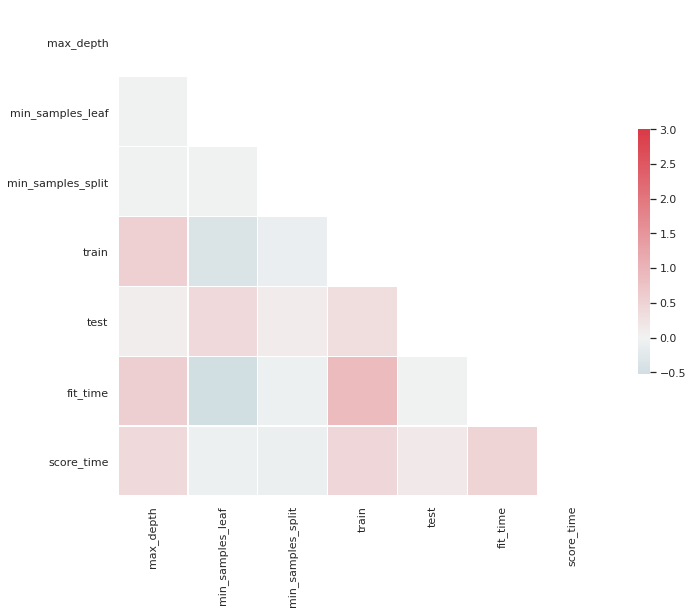

In [ ]:
corr = resultados.corr()

sns.set(style = "white")

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax = 3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
45,3,256,64,78.751156,78.692477,0.010525,0.001457
41,3,128,64,78.751156,78.692477,0.010324,0.001353
39,3,64,256,78.751156,78.692477,0.010268,0.001359
47,3,256,256,78.751156,78.692477,0.010161,0.001368
46,3,256,128,78.751156,78.692477,0.010430,0.001428


#Aula 4: Buscando parâmetros com GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010781,0.000192,0.001609,0.000126,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.76435,0.794291,0.791287,0.786869,0.786667,0.809909,0.792453,0.792548,0.77175,0.779124,0.786925,0.012102,1
1,0.011270,0.000588,0.001630,0.000172,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.76435,0.794291,0.791287,0.786869,0.786667,0.809909,0.792453,0.792548,0.77175,0.779124,0.786925,0.012102,1
2,0.011327,0.001255,0.001626,0.000105,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.76435,0.794291,0.791287,0.786869,0.786667,0.809909,0.792453,0.792548,0.77175,0.779124,0.786925,0.012102,1
3,0.011156,0.001365,0.001562,0.000117,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.76435,0.794291,0.791287,0.786869,0.786667,0.809909,0.792453,0.792548,0.77175,0.779124,0.786925,0.012102,1
4,0.010837,0.000274,0.001581,0.000120,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.76435,0.794291,0.791287,0.786869,0.786667,0.809909,0.792453,0.792548,0.77175,0.779124,0.786925,0.012102,1


In [ ]:
print(busca.best_params_) #Melhores parâmetros
print(busca.best_score_ * 100) #Melhor acurácia

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.69247744191749


In [ ]:
melhor = busca.best_estimator_ #Melhor estrutura do estimador
melhor

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Evitar essa abordagem, pois está sendo otimista

predicitons = melhor.predict(x_azar)
accuracy = accuracy_score(predicitons, y_azar)
print("A acurácia para os dados foi %.2f%%" % (accuracy * 100))

A acurácia para os dados foi 78.75%


#Aula 5: Nested Cross Validation e validando o modelo escolhido

No caso de cross validation com busca de hiperparâmetros, fazemos uma nova validação cruzada, chamada de Nested Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits = 10 ), groups = dados.modelo)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The 'groups' parameter should not be None.

  FitFailedWarning)


#Infelizmente como o Pandas não suporta nested validation com group k fold, não conseguimos prever o resultado para novos grupos. Usaremos um KFold normal para realizar a predição.

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010204,0.000299,0.001765,0.000070,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.010699,0.001066,0.001896,0.000304,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.011238,0.001378,0.002179,0.000677,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.010322,0.000139,0.001810,0.000109,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.009826,0.000125,0.001687,0.000104,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Acurácia média %.2f%%" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 *desvio, media + 2 * desvio))

In [ ]:
imprime_score(scores)

Acurácia média 78.67%
Intervalo [76.80, 80.54]


In [ ]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


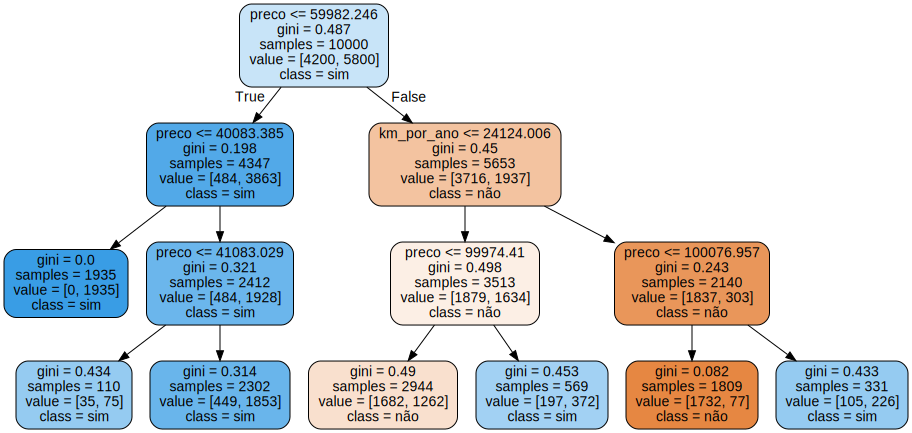

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names = features)

graph = graphviz.Source(dot_data)
graph

#Machine Learning: Otimização com exploração aleatória
##Aula 1: Randomized Search e Cross Validation combinadas

#Busca Aleatória: Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ['gini', 'entropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros, n_iter = 16, cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014167,0.001003,0.002083,0.000257,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.7755,0.7955,0.7895,0.7855,0.7740,0.7840,0.008210,12
1,0.011926,0.001666,0.001948,0.000331,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7755,0.8030,0.7895,0.7855,0.7815,0.7870,0.009241,1
2,0.009881,0.000209,0.001841,0.000262,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7755,0.8030,0.7895,0.7855,0.7815,0.7870,0.009241,1
3,0.020323,0.000725,0.001982,0.000283,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.7755,0.7955,0.7895,0.7855,0.7755,0.7843,0.007859,7
4,0.020183,0.000727,0.001847,0.000057,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7755,0.7955,0.7895,0.7855,0.7755,0.7843,0.007859,7


In [ ]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 10, shuffle=True))
imprime_score(scores)

Acurácia média 78.67%
Intervalo [75.91, 81.43]


In [ ]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=64,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#Aula 2: Explorando por mais tempo espaços maiores
##Customizando o espaço de hiper parâmetros

In [ ]:
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ['gini', 'entropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros, n_iter = 16, cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015206,0.001647,0.001643,0.000126,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7895,0.783,0.7905,0.7885,0.7840,0.7871,0.003023,1
1,0.017319,0.000499,0.001914,0.000248,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7790,0.772,0.7795,0.7795,0.7780,0.7776,0.002853,11
2,0.016752,0.001123,0.001844,0.000058,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7810,0.769,0.7815,0.7850,0.7765,0.7786,0.005508,5
3,0.020118,0.000621,0.002010,0.000171,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7720,0.767,0.7685,0.7685,0.7805,0.7713,0.004885,16
4,0.016282,0.000570,0.001845,0.000076,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7810,0.769,0.7795,0.7865,0.7765,0.7785,0.005753,7


In [ ]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 10, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Acurácia média 78.69%
Intervalo [76.34, 81.04]
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=71, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.787 +-(0.006) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.785 +-(0.010) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.783 +-(0.011) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.780 +-(0.011) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +-(0.011) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +-(0.008) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.778 +-(0.012) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.778 +-(0.007) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.778 +-(0.007) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 100, 'min_samples_split': 84}
0.778 +-(0.011) {'criterion': 'gini', 'max_depth': 

In [ ]:
#Uma exploração mais a fundo de forma aleatória

from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ['gini', 'entropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), espaco_de_parametros, n_iter = 64, cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014752,0.000575,0.001781,0.000205,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7800,0.7835,0.7990,0.7860,0.7860,0.7869,0.006437,1
1,0.017658,0.000523,0.001618,0.000037,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7745,0.7700,0.7920,0.7860,0.7775,0.7800,0.007956,29
2,0.016455,0.000508,0.001741,0.000252,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7730,0.7710,0.7945,0.7805,0.7800,0.7798,0.008250,30
3,0.019752,0.000961,0.001697,0.000093,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7750,0.7620,0.7910,0.7730,0.7675,0.7737,0.009765,53
4,0.016073,0.000727,0.001682,0.000078,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7670,0.7645,0.7940,0.7805,0.7800,0.7772,0.010642,46


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.787 +-(0.013) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +-(0.013) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +-(0.013) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +-(0.013) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +-(0.013) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +-(0.013) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +-(0.013) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +-(0.013) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.784 +-(0.020) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.784 +-(0.020) {'criterion': 'gini', 'max_depth': 5, '

In [ ]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 10, shuffle=True))
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Acurácia média 78.69%
Intervalo [76.54, 80.84]
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=71, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#Aula 3: Baseline com busca exaustiva no espaço
##Comparando GridSearchCV com RandomizedSearch (1 comparação)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion" : ['gini', 'entropy']
}


tic = time.time()
busca = GridSearchCV(RandomForestClassifier(), espaco_de_parametros, cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 222.09 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043961,0.003384,0.004200,0.000133,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,130
1,0.385020,0.010453,0.022382,0.000903,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,93
2,0.040320,0.000729,0.003994,0.000111,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,89
3,0.373252,0.011672,0.022647,0.001544,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,119
4,0.039281,0.001185,0.003856,0.000049,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,135


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [ ]:
#Esse processo vai demorar tanto com cross validation que o Google Colab vai cortar o runtime da minha celula antes dele ser validado

tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 10, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f em segundos" % tempo_que_passou)
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

KeyboardInterrupt: ignored

#Aula 4: Comparando com o Randomized Search

In [ ]:
SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion" : ['gini', 'entropy']
}


tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros, n_iter=20, cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 32.72 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.458731,0.017726,0.022641,0.001138,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,10
1,0.063314,0.005559,0.004369,0.000227,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,13
2,0.623335,0.003629,0.025061,0.000692,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,6
3,0.038741,0.001208,0.003804,0.000101,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,20
4,0.061836,0.003625,0.004118,0.000499,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,18


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.776 +-(0.025) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.023) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.024) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.032) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.035) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [ ]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 10, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f em segundos" % tempo_que_passou)
imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 286.79 em segundos
Acurácia média 77.54%
Intervalo [75.90, 79.18]
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [True, False],
    "criterion" : ['gini', 'entropy']
}


tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros, n_iter=80, cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 112.15 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.379451,0.008932,0.021518,0.001420,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7620,0.7750,0.7855,0.7580,0.7704,0.009744,75
1,0.293711,0.007847,0.018812,0.001138,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7575,0.7925,0.7855,0.7575,0.7729,0.014277,63
2,0.282646,0.002736,0.018348,0.001687,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7695,0.7925,0.7795,0.7575,0.7735,0.011781,59
3,0.181552,0.002835,0.011527,0.000135,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7670,0.7830,0.7865,0.7580,0.7733,0.010429,60
4,0.278438,0.005624,0.016451,0.000227,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7685,0.7930,0.7850,0.7585,0.7754,0.012220,30


In [ ]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.779 +-(0.025) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 84, 'min_samples_split': 89, 'n_estimators': 48}
0.778 +-(0.031) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 96, 'n_estimators': 18}
0.778 +-(0.032) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 121, 'min_samples_split': 47, 'n_estimators': 27}
0.778 +-(0.024) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 96, 'min_samples_split': 98, 'n_estimators': 11}
0.777 +-(0.029) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 63, 'min_samples_split': 88, 'n_estimators': 69}


#Aula 5: Optimização de hiper parâmetros sem validação cruzada
##Se eu não posso ou não consigo usar cross validation



In [ ]:
# 0.6 treino
# 0.2 teste
# 0.2 validacao

SEED = 301
np.random.seed(SEED)

x_treino_teste, x_validacao, y_treino_teste, y_validacao = train_test_split(x_azar, y_azar, test_size = 0.25, shuffle=True, stratify=y_azar)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED = 301
np.random.seed(SEED)
espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [True, False],
    "criterion" : ['gini', 'entropy']
}


split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), espaco_de_parametros, n_iter=80, cv = split)

busca.fit(x_treino_teste, y_treino_teste)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 18.54 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.300274,0.0,0.016952,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.762667,0.762667,0.0,76
1,0.248837,0.0,0.017450,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.770000,0.770000,0.0,70
2,0.254457,0.0,0.017789,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.776667,0.776667,0.0,24
3,0.168200,0.0,0.011252,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.774667,0.774667,0.0,51
4,0.254917,0.0,0.014164,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.775333,0.775333,0.0,45


In [ ]:
tic = time.time()
scores = cross_val_score(busca, x_validacao, y_validacao, cv = split)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f em segundos" % tempo_que_passou)
scores

Tempo 8.59 em segundos


array([0.742])